In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df = pd.read_csv('heart.csv',sep=',',encoding="utf-8")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.apply(lambda x:len(x.unique()))


,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
print('cp ',df['cp'].unique())
print('fbs ',df['fbs'].unique())
print('restecg ',df['restecg'].unique())
print('exang ',df['exang'].unique())
print('slope ',df['slope'].unique())
print('ca ',df['ca'].unique())
print('thal ',df['thal'].unique())


cp  [3 2 1 0]
fbs  [1 0]
restecg  [0 1 2]
exang  [0 1]
slope  [0 2 1]
ca  [0 2 1 3 4]
thal  [1 2 3 0]


(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

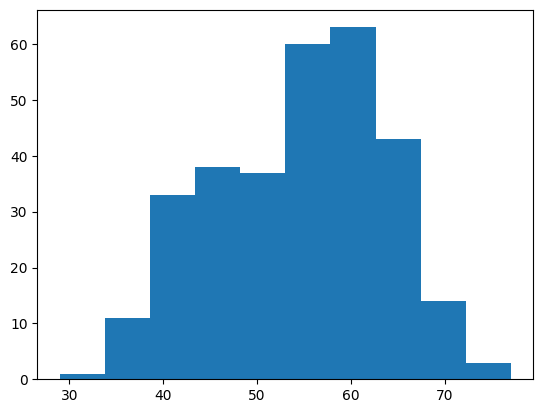

In [ ]:
plt.hist(df['age'], bins=None, range=None, density=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


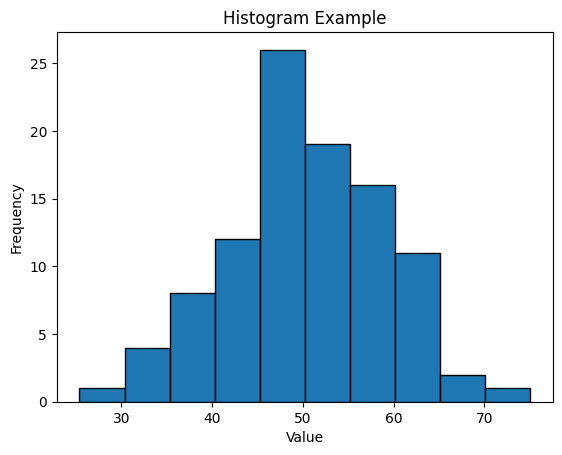

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = np.random.randn(100) * 10 + 50  # Generating some random data

# Plot histogram
n, bins, patches = plt.hist(data, bins=10, edgecolor='black')

# Show the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.show()


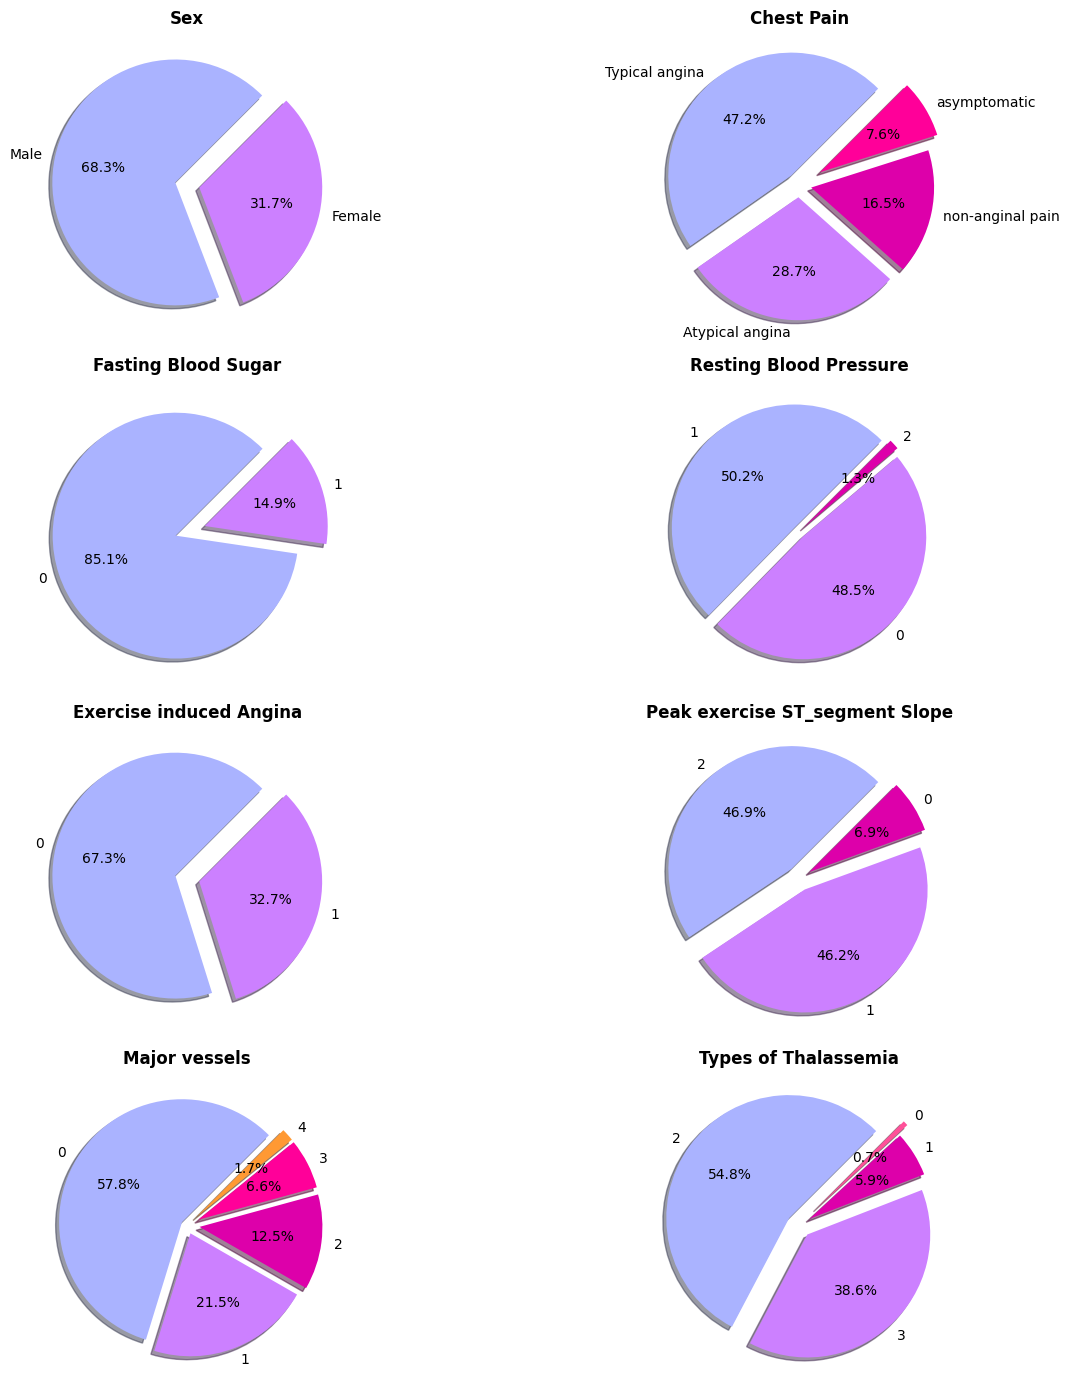

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ["Male", "Female"]
values = df['sex'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax1.set_title("Sex", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Typical angina", "Atypical angina","non-anginal pain","asymptomatic"]
values = df['cp'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099'],shadow=True,startangle=45,explode=[0.1, 0.1, 0.1, 0.2])
ax2.set_title("Chest Pain", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['fbs'].value_counts().index.tolist()[:2]
values = df['fbs'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Fasting Blood Sugar", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['restecg'].value_counts().index.tolist()[:3]
values = df['restecg'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[ 0.05, 0.05, 0.05])
ax4.set_title("Resting Blood Pressure", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['exang'].value_counts().index.tolist()[:2]
values = df['exang'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax5.set_title("Exercise induced Angina", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['slope'].value_counts().index.tolist()[:3]
values = df['slope'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[  0.1, 0.1, 0.1])
ax6.set_title("Peak exercise ST_segment Slope", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['ca'].value_counts().index.tolist()[:5]
values = df['ca'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1,0.1],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099','#FF9933'])
ax7.set_title("Major vessels", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['thal'].value_counts().index.tolist()[:4]
values = df['thal'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.2],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF5099'])
ax8.set_title("Types of Thalassemia", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

plt.savefig("PiePlots.png")

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

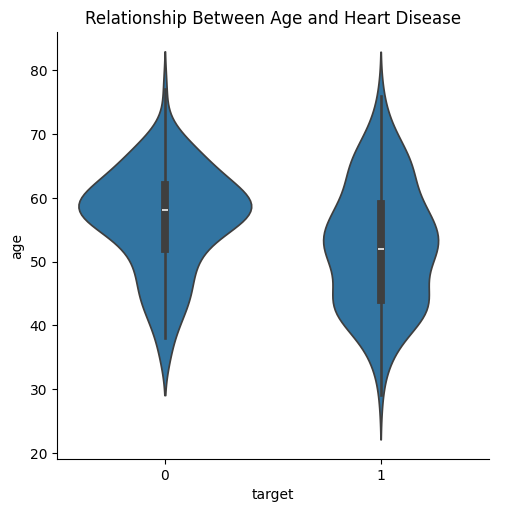

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and contains 'target' and 'age' columns
sns.catplot(x='target', y='age', data=df, kind='violin')

# Adding title
plt.title('Relationship Between Age and Heart Disease')

# Saving the figure
plt.savefig("age.png")

# Show the plot
plt.show()
